# Extract the PSF  some stars in HD163466 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 without grating


## 1) Import package

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [48]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [49]:
#photutils.test()

In [50]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [51]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [52]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-30 13:43:17.159868
fits date format for the analysis :  2016-06-30T13:43:17


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [53]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD163466_none'

In [54]:
path='./HD163466_none'
basefilename='AssScImHD163466_none_8.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [55]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

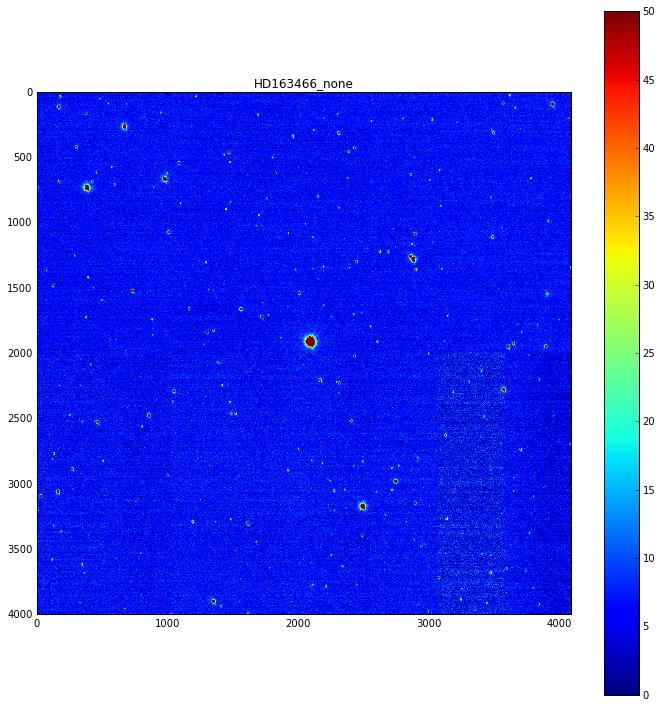

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [57]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [58]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 6.1977454522503006)
('median rms = ', 2.3989446017984579)


### Radiography of the residual background

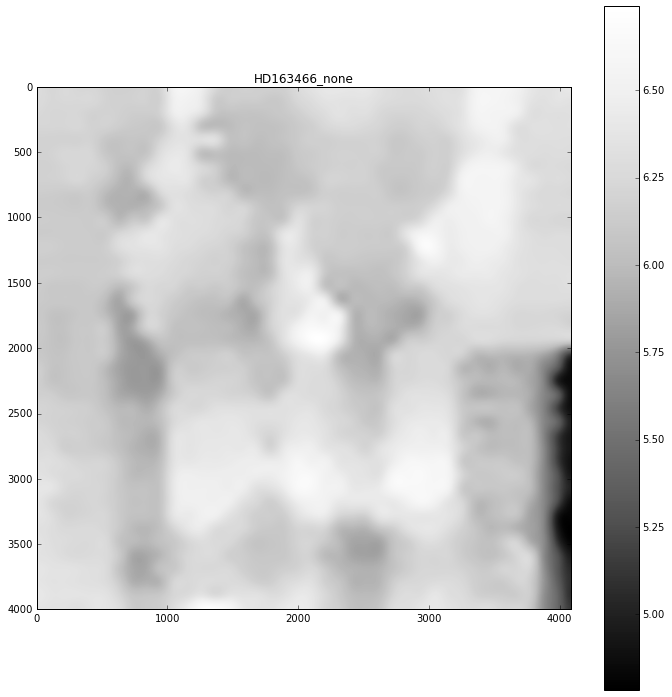

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [60]:
data2=data - bkg.background

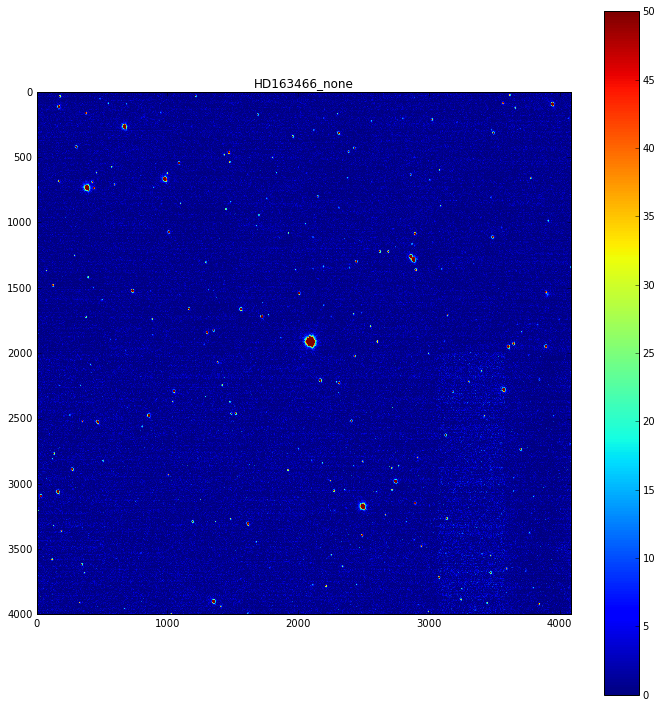

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [62]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.050570879864903696, 0.0051776003807719739, 2.6535365028120381)


In [63]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
 10 1005.94807824 1074.42106479 ... 409.639690482 1.07279147757 -0.0762882868771
 20 1554.93999649 1665.93182435 ... 541.617313467 1.07309418144 -0.0765946000782
 29 2161.29116046 2210.16499678 ... 550.786489607 1.07799533908 -0.0815422077452
  6 673.300806476 274.159717579 ... 913.462196412 1.08679522373 -0.0903693027593
 32 1045.73052357 2291.64484808 ... 448.396779448 1.09477795182 -0.0983151059768
 41 1351.23538944 3901.92079723 ... 962.273168208 1.11250106642  -0.115751089901
 21 1716.49061398 1720.64670492 ... 492.401571702 1.13977767281  -0.142050363232
 34 851.752062503 2478.89533582 ... 589.322496679 1.14092171516  -0.143139615343
 40 1344.67033811 3897.37660032 ... 711.612107886 1.15041678241  -0.152138021553
 19  1556.9879152 1663.66220449 ... 614.925031272  1.1817083408   -0.18127575225
...           ...           

In [64]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10,1005.94807824,1074.42106479,0.381000665843,-0.824737173158,0.0794267138311,25.0,0.0,409.639690482,1.07279147757,-0.0762882868771
20,1554.93999649,1665.93182435,0.517040200024,-0.00339185711141,0.0502294070075,25.0,0.0,541.617313467,1.07309418144,-0.0765946000782
29,2161.29116046,2210.16499678,0.430226828236,-0.00773343661608,0.3016765728,25.0,0.0,550.786489607,1.07799533908,-0.0815422077452
6,673.300806476,274.159717579,0.533230410471,0.77147010539,-0.0728366823471,25.0,0.0,913.462196412,1.08679522373,-0.0903693027593
32,1045.73052357,2291.64484808,0.478559615943,-0.54259384049,0.0454261640608,25.0,0.0,448.396779448,1.09477795182,-0.0983151059768
41,1351.23538944,3901.92079723,0.498040285849,0.350470703781,-0.175094074744,25.0,0.0,962.273168208,1.11250106642,-0.115751089901
21,1716.49061398,1720.64670492,0.478846809132,-0.557734627961,0.0124328212647,25.0,0.0,492.401571702,1.13977767281,-0.142050363232
34,851.752062503,2478.89533582,0.411551564635,-0.34002004362,0.16697096727,25.0,0.0,589.322496679,1.14092171516,-0.143139615343
40,1344.67033811,3897.37660032,0.402747000147,0.978557380609,0.796023246184,25.0,0.0,711.612107886,1.15041678241,-0.152138021553


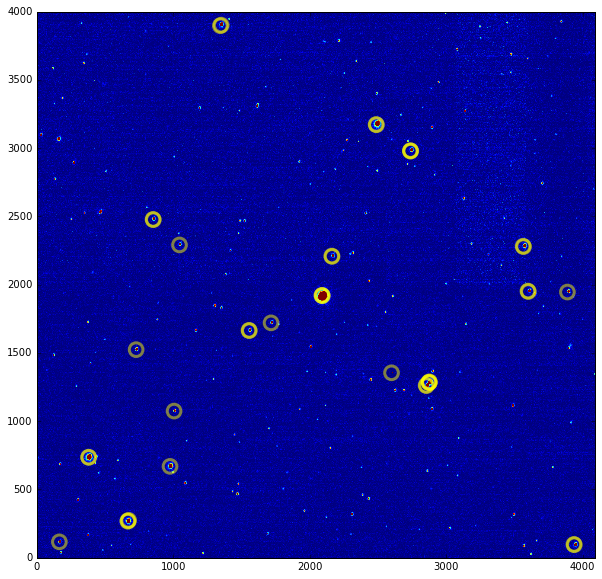

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [66]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)
selected_stars=sources.as_array()
for istar in range(NBSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

1005.0 1074.0
1554.0 1665.0
2161.0 2210.0
673.0 274.0
1045.0 2291.0
1351.0 3901.0
1716.0 1720.0
851.0 2478.0
1344.0 3897.0
1556.0 1663.0
3598.0 1953.0
2737.0 2978.0
2877.0 1288.0
727.0 1524.0
3934.0 97.0
3601.0 1950.0
3887.0 1946.0
853.0 2476.0
2874.0 1281.0
2852.0 1263.0
165.0 116.0
2163.0 2207.0
2736.0 2982.0
667.0 269.0
3562.0 2282.0


## Work with one PSF of one star

In [67]:
# Extract the plot of a PSF
index=2

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


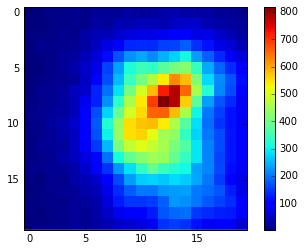

In [68]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

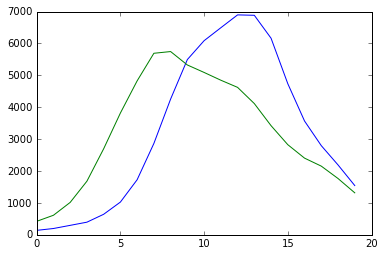

In [69]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [70]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [71]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [72]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(11.783667635390289, 3.5941971782797166)

In [73]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(9.8696375341343234, 4.2894685795126737)

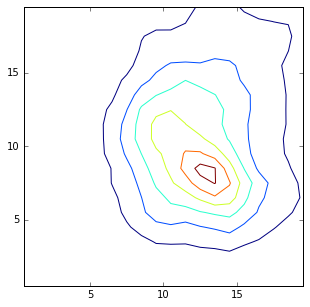

In [74]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [75]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [76]:
weighted_avg_and_std(Xgrid,onepsf2)

(1.7836676353902858, 3.5941971782797171)

In [77]:
weighted_avg_and_std(Ygrid,onepsf2)

(-0.13036246586567526, 4.2894685795126737)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [78]:
import photutils.psf 
from photutils.psf import psf_photometry

In [79]:
from astropy.modeling import models, fitting

In [80]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [81]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


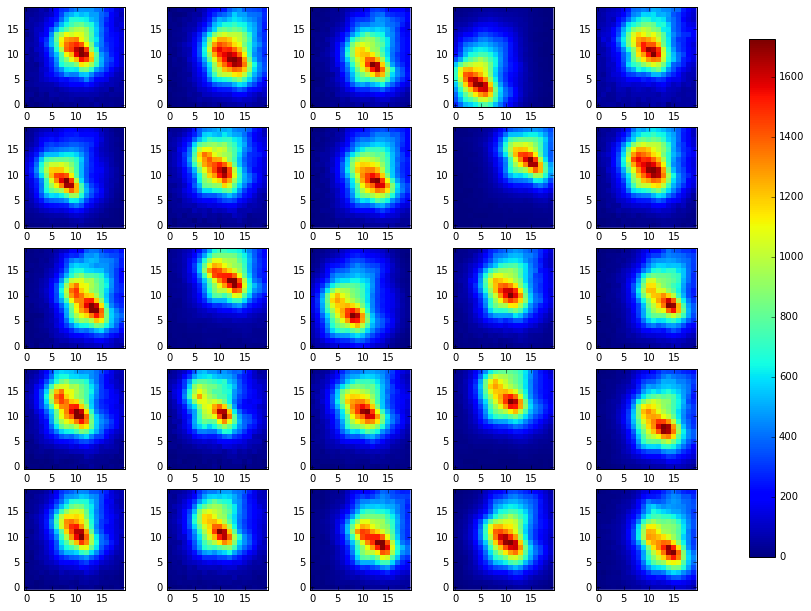

In [82]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [83]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

In [84]:
SIGMAX_OF_STARS

array([ 3.61695675,  3.57771094,  3.59419718,  3.5802566 ,  3.74639033,
        3.78137366,  3.8262054 ,  3.60963167,  3.31769691,  3.72790203,
        3.59638363,  3.66298004,  3.93821253,  3.71990925,  3.52418053,
        3.83330849,  3.92808272,  3.73914095,  3.85601755,  3.66651809,
        3.49296767,  3.71087395,  3.57866668,  3.62251793,  3.51283678,
        3.83141322,  3.90853385,  3.86400087,  3.87724443,  3.67699381,
        0.95983272,  3.90102243,  3.65158111,  3.72522919,  3.56281502,
        3.56329317,  3.62072757,  3.80755603,  3.98770163,  3.93560282,
        3.92676062])

In [85]:
SIGMAY_OF_STARS

array([ 3.93206376,  4.21714769,  4.28946858,  4.35632611,  3.93543329,
        3.99402869,  3.94975223,  4.19604976,  3.45010231,  3.94841274,
        4.45421108,  3.54387309,  4.52539895,  3.99449   ,  4.29346025,
        4.01875293,  3.96394383,  3.9117144 ,  3.70484521,  4.39712761,
        3.93698543,  3.88180164,  4.10470493,  4.19700678,  4.42071973,
        3.85417122,  4.00327441,  3.90230401,  4.0537283 ,  4.35724909,
        0.97161018,  4.11942813,  3.94669542,  3.9746149 ,  4.16829831,
        4.09371574,  4.05679981,  3.8437214 ,  4.77836846,  4.26966433,
        4.43713568])

#### Cut NAN

In [86]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [87]:
all_sigx=all_sigx[all_sigx>2.4]
all_sigy=all_sigy[all_sigy>2.4]

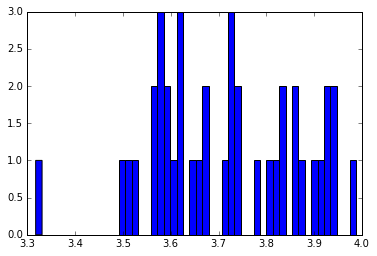

In [88]:
h1=plt.hist(all_sigx,50)

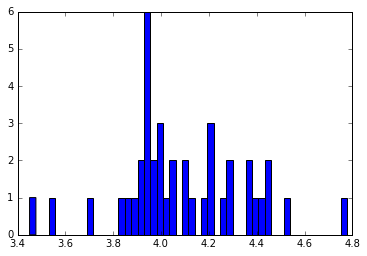

In [89]:
h1=plt.hist(all_sigy,50)

In [90]:
all_sigx.mean()

3.7150348503829287

In [91]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.72 +/- 0.15 pixels ==> psf  3.51 +/- 0.14 arcsec 
average prf(y) = 4.09 +/- 0.26 pixels ==> psf  3.86 +/- 0.23 arcsec 


In [92]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.72 +/- 0.15 pixels ==> psf  3.51 +/- 0.14 arcsec 
average prf(y) = 4.04 +/- 0.26 pixels ==> psf  3.81 +/- 0.23 arcsec 
